In [46]:
#os.environ['PROJ_LIB'] = 'C:\Users\Amrit\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\share\proj'
# This tells matplotlib not to try opening a new window for each plot.

%matplotlib inline

# General libraries.
import re
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
#import Basemap
 

In [2]:
os.getcwd()

'C:\\Users\\Amrit\\desktop\\sub_python_course\\ml\\KIVA\\w207-FinalProj'

# 1. EDA

## Kiva Loans

In [3]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_kiva_loans.head()
df_kiva_loans.describe(include = 'all')

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
count,6.712050e+05,671205.000000,671205.000000,671205,671205,666977,671197,671205,614405,671205,657698.000000,671205,668809,622874,671205.000000,671205.000000,499789,666984,671205,671205
unique,NaN,NaN,NaN,163,15,424913,86,87,12695,67,NaN,667399,5719,498007,NaN,NaN,86719,11298,4,1298
top,NaN,NaN,NaN,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,NaN,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,NaN,NaN,user_favorite,female,monthly,2017-03-20
freq,NaN,NaN,NaN,72955,180302,5217,160441,160441,10000,160440,NaN,25,2800,33,NaN,NaN,27088,426502,342717,1308
mean,9.932486e+05,785.995061,842.397107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.199616,NaN,NaN,NaN,13.739022,20.590922,NaN,NaN,NaN,NaN
std,1.966113e+05,1130.398941,1198.660073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.247581,NaN,NaN,NaN,8.598919,28.459551,NaN,NaN,NaN,NaN
min,6.530470e+05,0.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,8.230720e+05,250.000000,275.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.000000,NaN,NaN,NaN,8.000000,7.000000,NaN,NaN,NaN,NaN
50%,9.927800e+05,450.000000,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000,NaN,NaN,NaN,13.000000,13.000000,NaN,NaN,NaN,NaN
75%,1.163653e+06,900.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.000000,NaN,NaN,NaN,14.000000,24.000000,NaN,NaN,NaN,NaN


In [4]:
df_kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
id,1.000000,-0.049578,-0.027488,0.154787,-0.055832,-0.095418
funded_amount,-0.049578,1.000000,0.945044,-0.075276,0.149310,0.849168
loan_amount,-0.027488,0.945044,1.000000,-0.071251,0.184795,0.798697
partner_id,0.154787,-0.075276,-0.071251,1.000000,0.094878,-0.008575
term_in_months,-0.055832,0.149310,0.184795,0.094878,1.000000,0.227283
lender_count,-0.095418,0.849168,0.798697,-0.008575,0.227283,1.000000


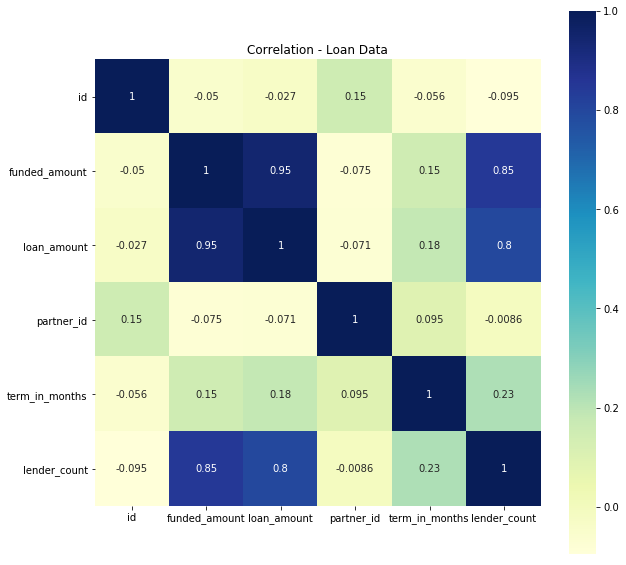

In [5]:
corr_loan = df_kiva_loans.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_loan, 
            xticklabels=corr_loan.columns.values,
            yticklabels=corr_loan.columns.values, cmap="YlGnBu",annot=True,square=True)
plt.title('Correlation - Loan Data')
corr_loan

**Funded Amount, Loan Amount and Lender Count are highly correlated**


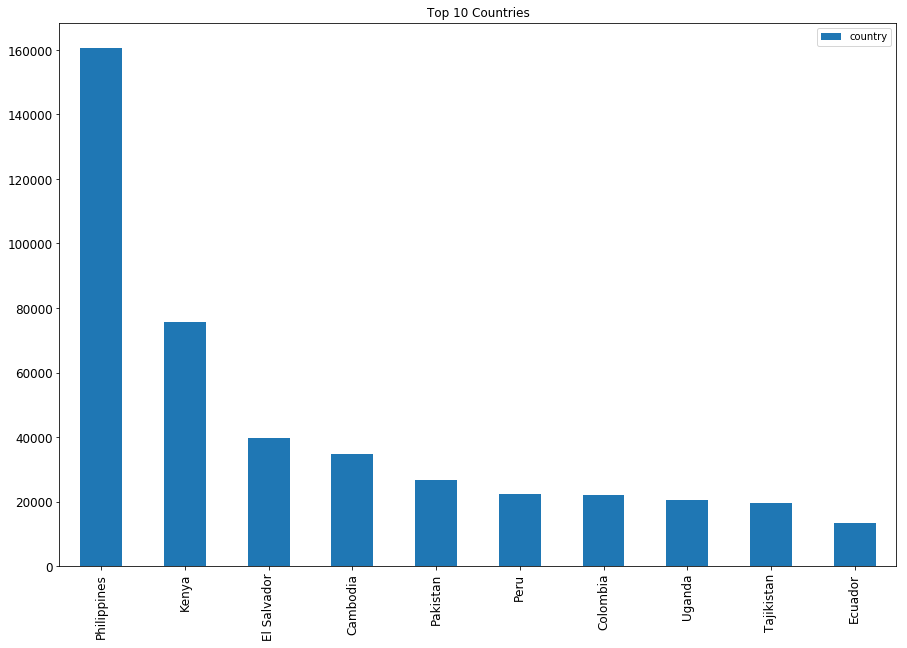

In [6]:
df_kiva_loans['country'].value_counts().head(10).plot(kind='bar', title ="Top 10 Countries", figsize=(15, 10), legend=True, fontsize=12)

**Philippines, Kenya and El Salvador are the top 3 countries featuring in Loans dataset**

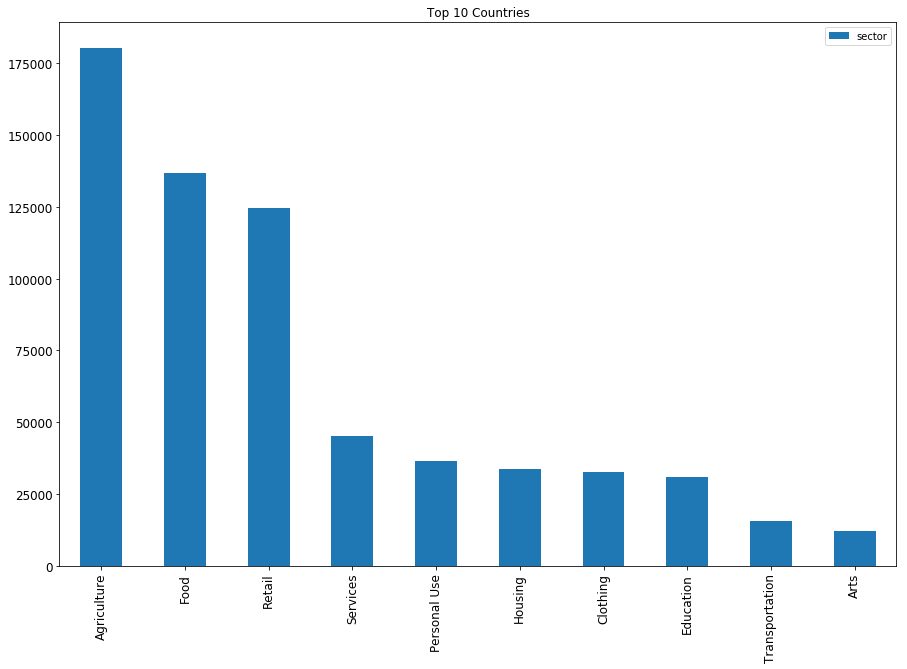

In [7]:
df_kiva_loans['sector'].value_counts().head(10).plot(kind='bar', title ="Top 10 Countries", figsize=(15, 10), legend=True, fontsize=12)

**Agriculture, Food and Retail are the top 3 sectors featuring in Loans dataset**

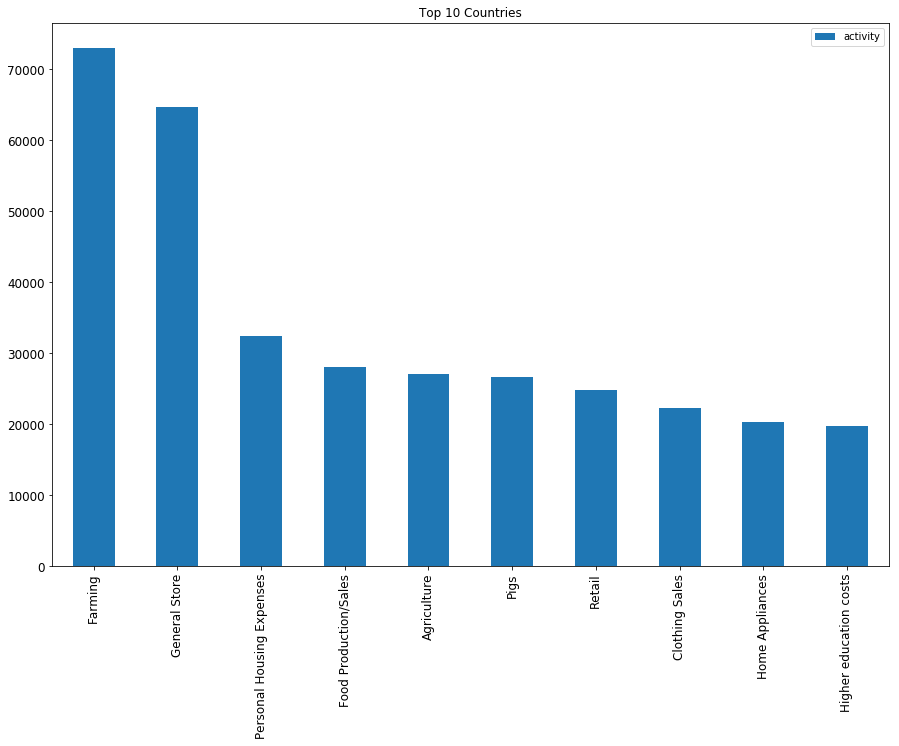

In [8]:
df_kiva_loans['activity'].value_counts().head(10).plot(kind='bar', title ="Top 10 Countries", figsize=(15, 10), legend=True, fontsize=12)

**Farming is the top activity, followed by General Store and Personal Housing Expenses**

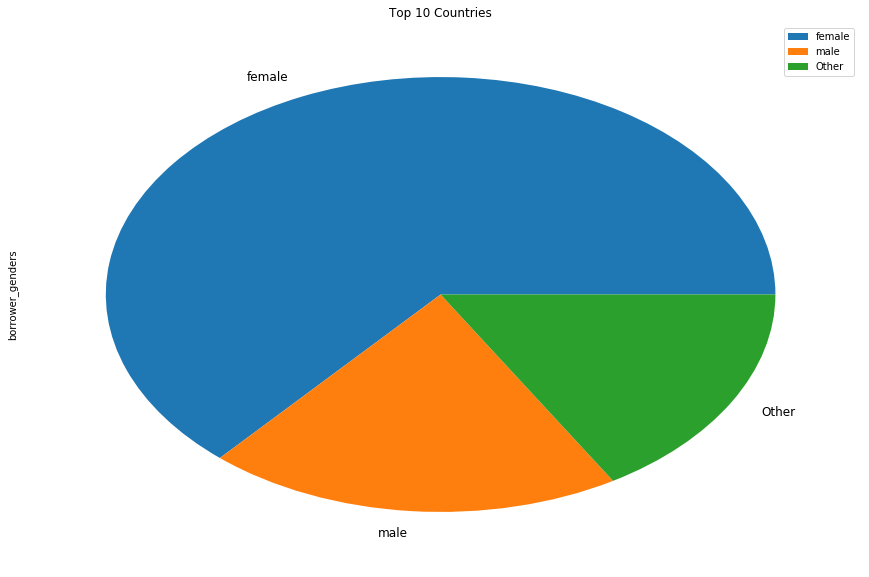

In [9]:
#labels = df_kiva_loans['borrower_genders'].value_counts() 
df_kiva_loans['borrower_genders']=[elem if elem in ['female','male'] else 'Other' for elem in df_kiva_loans['borrower_genders'] ]

df_kiva_loans['borrower_genders'].value_counts().head(3).plot(kind='pie', title ="Top 10 Countries", figsize=(15, 10), legend=True, fontsize=12)

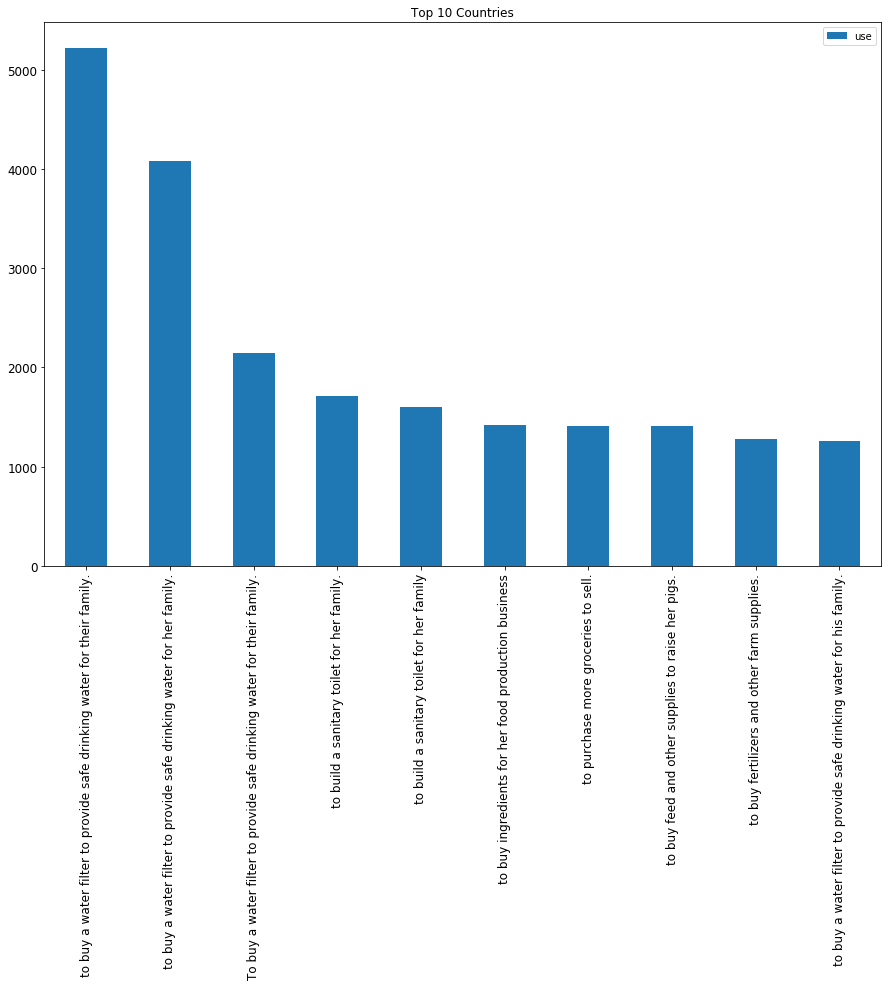

In [24]:
df_kiva_loans['use'].value_counts().head(10).plot(kind='bar', title ="Top 10 Countries", figsize=(15, 10), legend=True, fontsize=12)

Text(0.5,1,'Scatter Plot of Funded Amount and Term')

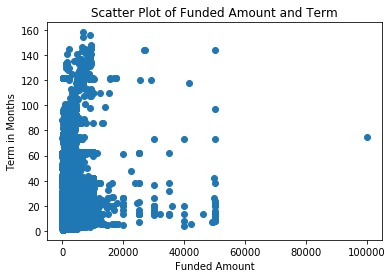

In [10]:
plt.scatter(df_kiva_loans['funded_amount'], df_kiva_loans['term_in_months'])
plt.xlabel('Funded Amount')
plt.ylabel('Term in Months')
plt.title('Scatter Plot of Funded Amount and Term')

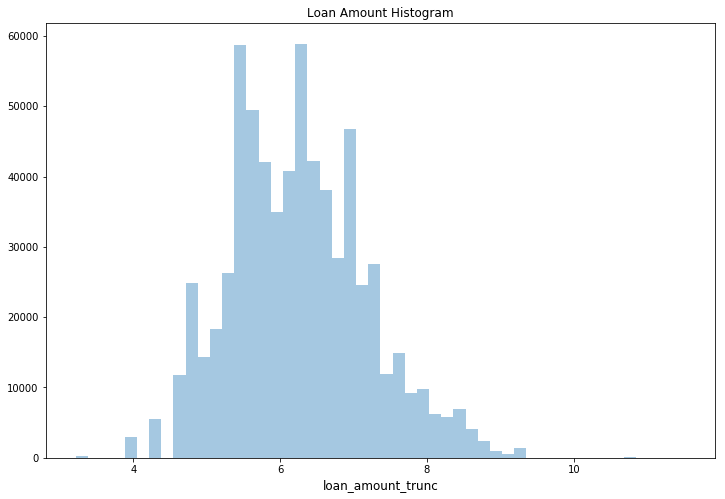

In [32]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(df_kiva_loans.loan_amount.values), bins=50, kde=False)
plt.xlabel('loan_amount_trunc', fontsize=12)
plt.title("Log Loan Amount Histogram")
plt.show()


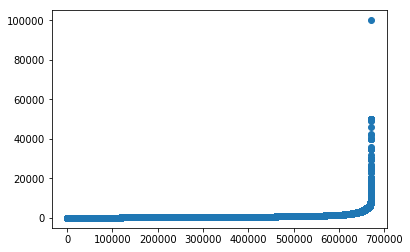

In [37]:
plt.scatter(range(df_kiva_loans.shape[0]), np.sort(df_kiva_loans.funded_amount.values))

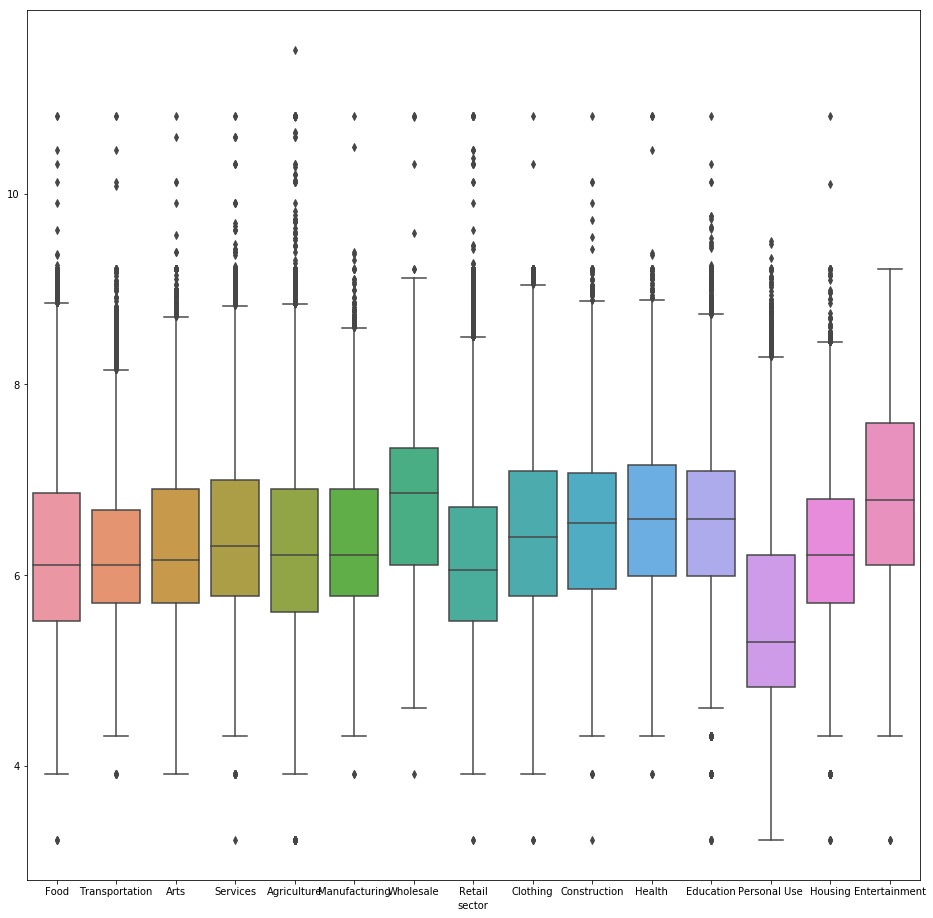

In [40]:
plt.figure(figsize=(16,16))
sns.boxplot(df_kiva_loans['sector'], np.log(df_kiva_loans.loan_amount.values))
#plt.xlabel('Bedrooms')
#plt.ylabel('Log Sale Price')
#plt.title('Box Plot of Log Sale Price by Bedrooms')


In [13]:
df_repay = round(df_kiva_loans.groupby(['country'])['term_in_months'].median(),2)


Text(0.5,1,'Box Plot of Log Sale Price by Bedrooms')

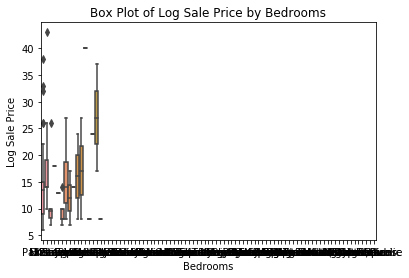

In [34]:
sns.boxplot(df_kiva_loans['country'], df_repay.values)
plt.xlabel('Bedrooms')
plt.ylabel('Log Sale Price')
plt.title('Box Plot of Log Sale Price by Bedrooms')

## mpi_region_locations

In [15]:
df_region = pd.read_csv("kiva_mpi_region_locations.csv")
df_region.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [16]:
df_region['world_region'].unique()

array(['South Asia', 'Europe and Central Asia', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'East Asia and the Pacific',
       'Arab States', nan], dtype=object)

In [ ]:
m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a marker per city of the data frame!
m.plot(df_region['lat'], df_region['lon'], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)

## Loan_theme_ids

In [22]:
df_theme = pd.read_csv("loan_theme_ids.csv")
df_theme.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [23]:
df_theme['Loan Theme Type'].unique()

array(['General', 'Higher Education', 'Subsistence Agriculture',
       'Extreme Poverty', 'Underserved', 'Mobile Transactions', 'Green',
       'End Consumer Finance', 'Agriculture', 'Vulnerable Women',
       'Full Tuition', 'Business in a Box', 'Organic Conversion',
       'Startup', 'Youth', 'Rural Inclusion', 'WLIFT', 'Retailer Finance',
       'FUSAI', 'Water', 'Unbanked', 'Conflict Zone',
       "Hai Duong Women's Union", 'At-Risk Youth', 'Housing Improvement',
       'Haiti', 'Youth Entrepreneurship', 'Primary/Secondary Education',
       'Vulnerable Populations', 'Murabaha', 'Small Enterprise',
       'Agricultural Equipment', 'Artisan', 'Murabaha Youth',
       'Kiva City LA', 'Disaster Recovery', 'First/Second Chance',
       'Women Without Poverty', 'Agricultural Infrastructure',
       'CAMEO Partnership', 'Safe Water System for Institution',
       'Rural Conflict Zone', 'SME', 'Biodigester',
       'Clients below the poverty line', 'Distributor Finance - India',
       '

In [65]:
df_theme_reg = pd.read_csv("loan_themes_by_region.csv")
df_theme_reg

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
5,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,62225,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
6,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000007VvXr,Solar Home Systems,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,1300,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
7,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000weyk,General,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,237175,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0
8,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000007VvXr,Solar Home Systems,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,3050,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0
9,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,31425,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0


In [64]:
import mplleaflet
fig = plt.figure()    #This is missing in your code.
plt.plot(df_theme_reg['geocode'], 'r.')
mplleaflet.show()

In [61]:
fig,ax=plt.subplots(figsize=(8,8))
ax.plot(df_theme_reg['geocode'],'r.',alpha=0 )
mplleaflet.display (fig=fig)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


['[(13.6672596, 102.8975098)]',
 '[(13.0286971, 102.989615)]',
 '[(13.0286971, 102.989615)]',
 '[(12.0982918, 105.3131185)]',
 '[(12.0982918, 105.3131185)]',
 '[(12.0982918, 105.3131185)]',
 '[(12.0982918, 105.3131185)]',
 '[(12.1392352, 104.5655273)]',
 '[(12.1392352, 104.5655273)]',
 '[(12.1392352, 104.5655273)]',
 '[(12.1392352, 104.5655273)]',
 '[(12.1392352, 104.5655273)]',
 '[(11.6155109, 104.3791912)]',
 '[(11.6155109, 104.3791912)]',
 '[(11.6155109, 104.3791912)]',
 '[(10.7412089, 104.1930918)]',
 '[(11.2237383, 105.1258955)]',
 '[(11.2237383, 105.1258955)]',
 '[(11.2237383, 105.1258955)]',
 '[(12.8606299, 105.9699878)]',
 '[(12.8606299, 105.9699878)]',
 '[(11.5448729, 104.8921668)]',
 '[(11.3802442, 105.5005483)]',
 '[(11.3802442, 105.5005483)]',
 '[(11.3802442, 105.5005483)]',
 '[(11.3802442, 105.5005483)]',
 '[(12.3663211, 103.6362715)]',
 '[(12.3663211, 103.6362715)]',
 '[(12.3663211, 103.6362715)]',
 '[(12.3663211, 103.6362715)]',
 '[(13.6915377, 104.1001326)]',
 '[(13.691